___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Classifying Yelp Reviews Using NLP

Classify Yelp Reviews into 1 star or 5 star categories based on the text content in the reviews by using the multinomial naive bayes classifier and utilising the “term frequency inverse document frequency”(TfIdf) method for text processing. Created a pipeline for Vectorizing the inputs, transforming using the TfIdf Transformer and classifying using the MultinomialNB classifier.

## Imports

In [1]:
import nltk
import pandas as pd
import string
# nltk.download_shell()

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

In [7]:
import seaborn as sns ; sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

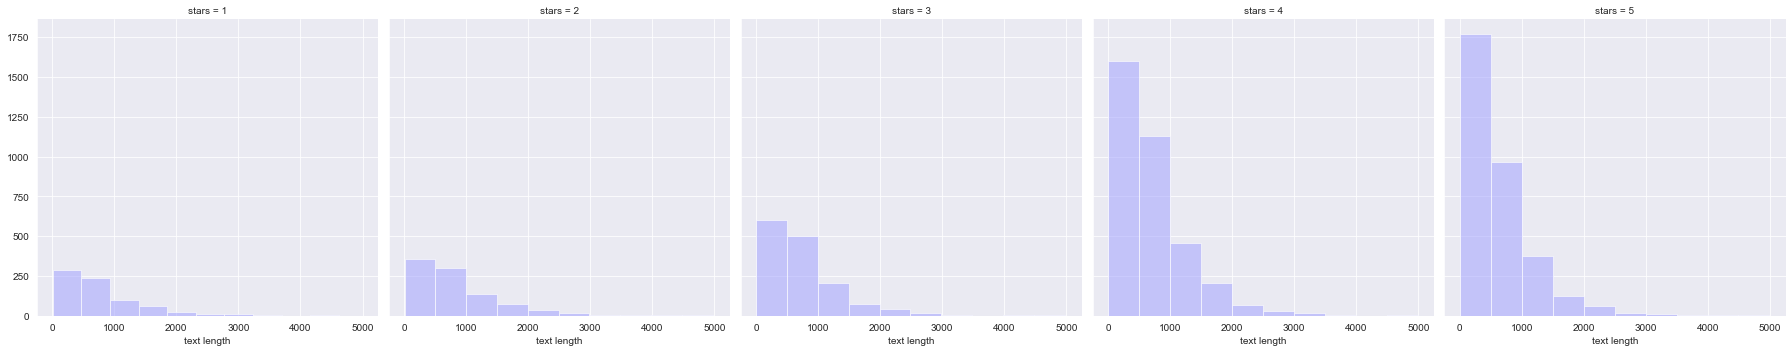

In [21]:
g = sns.FacetGrid(yelp,col = 'stars',height=5,aspect=1)
g.map(plt.hist,'text length',alpha=0.6,color='#AAF')

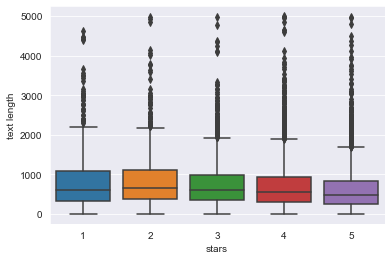

In [22]:
sns.boxplot(x='stars',y='text length',data=yelp)

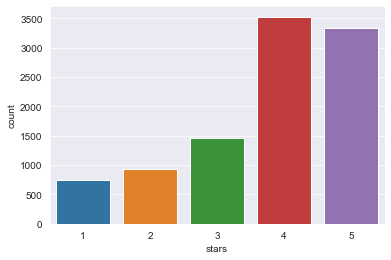

In [23]:
sns.countplot(x='stars',data=yelp)

In [30]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


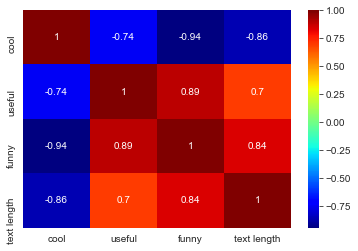

In [36]:
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='jet',annot=True)

## NLP Classification Task

In [116]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
# yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [117]:
X = yelp_class['text']
y= yelp_class['stars']

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [119]:
X = cv.fit_transform(X)

## Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training a Model

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
model = MultinomialNB().fit(X_train,y_train)

## Predictions and Evaluations


In [124]:
pred = model.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[162  67]
 [ 20 977]]
              precision    recall  f1-score   support

           1       0.89      0.71      0.79       229
           5       0.94      0.98      0.96       997

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.93      0.93      0.93      1226



# Using Text Processing

In [145]:
from sklearn.feature_extraction.text import TfidfTransformer

In [146]:
from sklearn.pipeline import Pipeline

In [147]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline


### Train Test Split

In [148]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [149]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation



In [150]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 36 192]
 [146 852]]
              precision    recall  f1-score   support

           1       0.20      0.16      0.18       228
           5       0.82      0.85      0.83       998

    accuracy                           0.72      1226
   macro avg       0.51      0.51      0.51      1226
weighted avg       0.70      0.72      0.71      1226

